Recommended Cities to Visit per County:
| County      | City              |   Latitude |   Longitude |
|-------------|-------------------|------------|-------------|
| Alexander   | Olive Branch      |    37.16   |     89.369  |
| Brown       | Mount Sterling    |    39.9867 |     90.7653 |
| Cass        | Virginia          |    39.9525 |     90.2108 |
| Clay County | Louisville (seat) |    38.7723 |     88.5025 |
| Franklin    | Orient            |    37.9188 |     88.976  |
| Greene      | White Hall        |    39.4395 |     90.3992 |
| Lawrence    | Bridgeport        |    38.7058 |     87.76   |
| Massac      | Metropolis        |    37.1533 |     88.7253 |
| Vermilion   | Danville          |    40.1244 |     87.63   |
| White       | Carmi             |    38.0883 |     88.1681 |


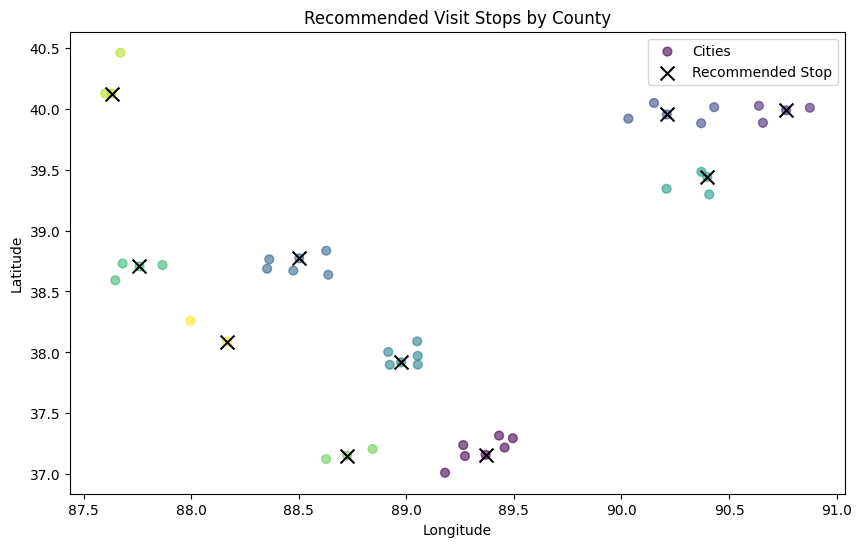

In [ ]:
!pip install tabulate

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tabulate import tabulate

#Load city data
df = pd.read_csv('Cities.csv')

# clean and convert columns to numeric
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# determine stops per county (1 stop per 2000 residents)
threshold = 2000
county_totals = df.groupby('County')['Population'].sum()
stops_per_county = (county_totals / threshold).apply(lambda x: max(1, int(round(x)))).to_dict()

# cluster within each county and choose nearest city to each cluster center
recommendations = []
for county, group in df.groupby('County'):
    k = stops_per_county[county]
    coords = group[['Latitude', 'Longitude']]
    # run k-means
    kmeans = KMeans(n_clusters=k, random_state=42).fit(coords)
    centers = kmeans.cluster_centers_
    for center in centers:
        # find squared distances to find the nearest city
        dists = ((coords - center) ** 2).sum(axis=1)
        idx = dists.idxmin()
        recommendations.append({
            'County': county,
            'City': group.loc[idx, 'City'],
            'Latitude': round(group.loc[idx, 'Latitude'], 5),
            'Longitude': round(group.loc[idx, 'Longitude'], 5)
        })

rec_df = pd.DataFrame(recommendations)

# display centroid cities in table
print("Recommended Cities to Visit per County:")
print(tabulate(rec_df, headers='keys', tablefmt='github', showindex=False))

# plot geographic clusters and stops
plt.figure(figsize=(10, 6))

# plot all cities, colored coded by county
county_codes = df['County'].astype('category').cat.codes
plt.scatter(df['Longitude'], df['Latitude'], c=county_codes, s=40, alpha=0.6, label='Cities')

# mark recommended stops
plt.scatter(rec_df['Longitude'], rec_df['Latitude'], marker='x', c='black', s=100, label='Recommended Stop')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Recommended Visit Stops by County')
plt.legend()
plt.show()
